In [85]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [86]:
data = pd.read_csv('data.csv').drop(['Unnamed: 0', 'Population', 'Crime Cnt', 'Crime Rate'], axis=1)

#import data_prediction.csv. it's subset of the original file and will be be sufficient for testing.

In [87]:
data.head()

,AREA NAME,Vict Age,Vict Sex,Vict Descent,Status,LOCATION,LAT,LON,Crime Category,Weapon Category,DATE OCC Month,Year,Time Period,Age Group
0,Southwest,36,F,Black,AO,1100 W 39TH PL,34.0141,-118.2978,Violent Crimes,Physical Force,2020-01-01,2020,9PM - 12AM,31-45
1,Central,25,M,Hispanic/Latino,IC,700 S HILL ST,34.0459,-118.2545,Violent Crimes,Unknown,2020-01-01,2020,3AM - 6AM,19-30
2,Central,30,Unknown,Other,AA,200 E 6TH ST,34.0448,-118.2474,Sex Crimes,Unknown,2020-02-01,2020,9AM - 12PM,19-30
3,N Hollywood,76,F,White,IC,5400 CORTEEN PL,34.1685,-118.4019,Crimes Against Property and Vehicles,Unknown,2020-01-01,2020,3PM - 6PM,76-90
4,Mission,31,Unknown,Other,IC,14400 TITUS ST,34.2198,-118.4468,Property Crimes,Unknown,2020-01-01,2020,3AM - 6AM,31-45


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392184 entries, 0 to 392183
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AREA NAME        392184 non-null  object 
 1   Vict Age         392184 non-null  int64  
 2   Vict Sex         392184 non-null  object 
 3   Vict Descent     392184 non-null  object 
 4   Status           392184 non-null  object 
 5   LOCATION         392184 non-null  object 
 6   LAT              392184 non-null  float64
 7   LON              392184 non-null  float64
 8   Crime Category   392184 non-null  object 
 9   Weapon Category  392184 non-null  object 
 10  DATE OCC Month   392184 non-null  object 
 11  Year             392184 non-null  int64  
 12  Time Period      392184 non-null  object 
 13  Age Group        392184 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 41.9+ MB


In [89]:
data['Year'] = data['Year'].astype(str)

In [90]:
data['Vict Sex'].unique()

array(['F', 'M', 'Unknown'], dtype=object)

In [91]:
#Spliting data into data_num and data_cat

data_cat = data[[x for x in data.columns if data[x].dtype == 'O']]
data_num = data[[x for x in data.columns if data[x].dtype != 'O']]

In [92]:
#Label encoder the Vict Sex

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_cat['Vict Sex'] = label_encoder.fit_transform(data_cat['Vict Sex'])

data_cat['Vict Sex'].unique()

array([0, 1, 2])

In [93]:
#Feature Engineering to calculate the mean 

for x in data_cat.columns:
    if x != 'Vict Sex':
        dict1=data_cat.groupby([x])['Vict Sex'].mean().to_dict()
        data_cat[x] = data_cat[x].map(dict1)
        
df = pd.concat([data_cat, data_num], axis=1)

In [94]:
#Correlation

df.corr()['Vict Sex'].sort_values(ascending=False)

Vict Sex           1.000000
Vict Descent       0.671148
Crime Category     0.482159
LOCATION           0.457730
Age Group          0.446436
Weapon Category    0.278058
Status             0.175976
AREA NAME          0.082953
Time Period        0.056846
DATE OCC Month     0.033633
LAT                0.005782
Year               0.001141
LON               -0.006672
Vict Age          -0.195380
Name: Vict Sex, dtype: float64

<AxesSubplot:>

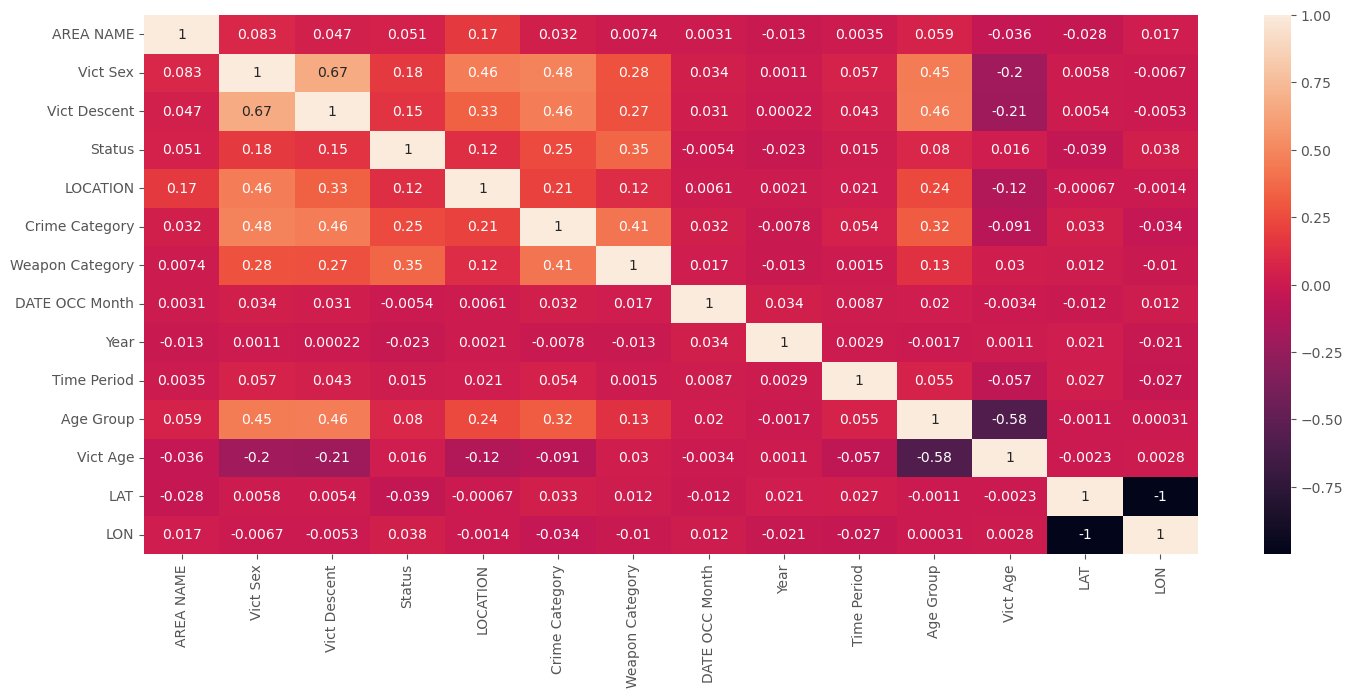

In [95]:
plt.figure(figsize=(17, 7))
sns.heatmap(df.corr(), annot=True)

In [96]:
#Select the best column use for analysis 


X = df.drop('Vict Sex', axis=1)
y = df.loc[:, 'Vict Sex']

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(Lasso(0.005))
model.fit(X, y)
model.get_support()

array([False,  True, False,  True,  True,  True, False, False, False,
        True,  True, False,  True])

In [97]:
X[X.columns[model.get_support()]]

,Vict Descent,LOCATION,Crime Category,Weapon Category,Age Group,Vict Age,LON
0,0.450093,0.958333,0.636778,0.460269,0.534071,36,-118.2978
1,0.506648,1.027778,0.636778,0.971243,1.202265,25,-118.2545
2,1.605673,1.322222,0.325778,0.971243,1.202265,30,-118.2474
3,0.587910,0.789474,1.617674,0.971243,0.493753,76,-118.4019
4,1.605673,1.666667,0.805102,0.971243,0.534071,31,-118.4468
...,...,...,...,...,...,...,...
392179,0.450093,1.138889,0.679173,0.777210,0.534071,36,-118.4729
392180,0.506648,0.714286,0.805102,0.971243,1.202265,19,-118.2902
392181,1.605673,1.250000,1.617674,0.971243,1.202265,30,-118.2741
392182,0.506648,0.661088,0.805102,0.971243,0.418844,15,-118.3351


In [98]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

orderd_rank_features = SelectKBest(score_func=chi2, k='all')

ordered_feature = orderd_rank_features.fit(X.drop(['LON'], axis=1), y)

In [99]:
ordered_feature.scores_

array([2.05671809e+01, 7.16517196e+04, 2.46302446e+02, 1.13118714e+04,
       1.85677584e+04, 1.60799967e+03, 3.85239811e-01, 9.50621073e-06,
       2.85438679e+00, 1.54334726e+04, 1.60765232e+05, 2.99667756e+00])

In [100]:
features = pd.concat([pd.DataFrame(X.drop('LON', axis=1).columns), 
            pd.DataFrame(ordered_feature.scores_, columns=['score']),
          ], axis=1).sort_values('score', ascending=False)
features 

,0,score
10,Vict Age,160765.232050
1,Vict Descent,71651.719591
4,Crime Category,18567.758374
9,Age Group,15433.472577
3,LOCATION,11311.871434
5,Weapon Category,1607.999674
2,Status,246.302446
0,AREA NAME,20.567181
11,LAT,2.996678
8,Time Period,2.854387


In [112]:
X = X[features[0][:8].tolist()]

In [114]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [115]:
#Display score

def display_scores(scores):
    print('===============================================')
    print('Scores: {}'.format(scores))
    print('===============================================')
    print('Mean Score: {}'.format(scores.mean()))
    print('===============================================')
    print('Standard Deviation of Scores: {}'.format(scores.std()))
    print('===============================================')
    
    return None


#Creat the predict function 

def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'Predictions: {pred}')
    print(f'Training Score: {model.score(X_train, y_train)}')
    print('\n')
    print(f'{confusion_matrix(pred, y_test)}')
    print('\n')
    print(f'Accuracy Score: {accuracy_score(pred, y_test)}')
    print(f'Mean Squared Error: {mean_squared_error(pred, y_test)}')
    
    scores = cross_val_score(model,
               X_train,
               y_train,
#                scoring='neg_mean_squared_error',
               cv=10)
    print('\n')
    display_scores(scores)
    
    plt.figure(figsize=(4,2))
    sns.kdeplot(pred, shade=True)
    sns.kdeplot(y_test, shade=True)
    plt.legend(['pred', 'y_test'])
    
    print('\n')
    plt.show()

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Predictions: [0 0 2 ... 1 2 0]
Training Score: 0.9688692852494453


[[28035 20228   209]
 [19045 33688  1023]
 [  238  1236 25719]]


Accuracy Score: 0.6756399656933574
Mean Squared Error: 0.3347215675972215


Scores: [0.67199452 0.67854017 0.67583819 0.67571168 0.67947937 0.68199117
 0.67848988 0.67856599 0.67704369 0.68077333]
Mean Score: 0.677842798093798
Standard Deviation of Scores: 0.0027074806305101297




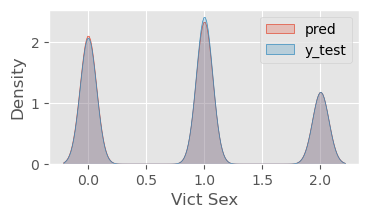

In [117]:
#Predictions - Tree

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

predict(tree)

Predictions: [0 0 1 ... 1 2 0]
Training Score: 0.9688654795385956


[[28686 16718   117]
 [18448 37212   784]
 [  184  1222 26050]]


Accuracy Score: 0.710456571962819
Mean Squared Error: 0.29652065738944994


Scores: [0.70677779 0.71632987 0.71241009 0.71335059 0.71297001 0.71681382
 0.71175217 0.71426397 0.71281778 0.71354087]
Mean Score: 0.7131026963093576
Standard Deviation of Scores: 0.0026114353841048864




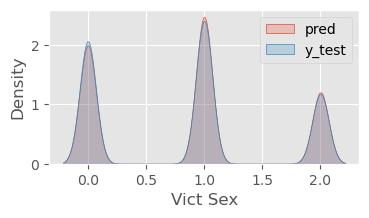

In [120]:
#Predictions - forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

predict(forest)

Predictions: [0 0 1 ... 1 2 1]
Training Score: 0.7947808481407199


[[27551 17421   110]
 [19566 36287   796]
 [  201  1444 26045]]


Accuracy Score: 0.6945008924363125
Mean Squared Error: 0.31270813855556673


Scores: [0.69787266 0.70068882 0.69661681 0.69782311 0.69519714 0.69850814
 0.69455016 0.70113411 0.69630081 0.6982798 ]
Mean Score: 0.6976971564229989
Standard Deviation of Scores: 0.0020267500929672215




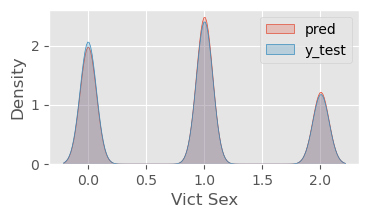

In [123]:
#Predictions - KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

predict(knn)

Predictions: [1 0 1 ... 1 2 0]
Training Score: 0.7472246853628555


[[27537 12849    48]
 [19590 41029   594]
 [  191  1274 26309]]


Accuracy Score: 0.7330726852674605
Mean Squared Error: 0.2724673739192249


Scores: [0.73566237 0.73642349 0.73558625 0.73626123 0.72986756 0.73527173
 0.73340691 0.73728878 0.73884914 0.73477698]
Mean Score: 0.7353394440854443
Standard Deviation of Scores: 0.0022870298681215255




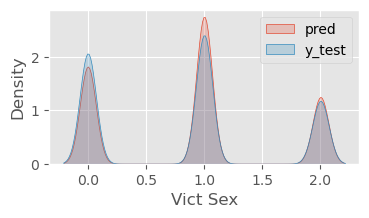

In [122]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

predict(xgb)